In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import plotly 
import chart_studio.plotly.plotly as py
import chart_studio
import plotly.express as px
import plotly.graph_objs as go
from matplotlib.pyplot import figure
from datetime import datetime
import pandas_ta as ta


from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import re

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string


from wordcloud import WordCloud

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec


#import plotly.graph_objects as go

In [2]:
# Loading the dataset to a dataframe
#sentence_file = "C:\Users\Dennis\Desktop\Coding\Final Project\Data\Combined_News_DJIA"
data = pd.read_csv(r'C:\Users\Dennis\Desktop\Coding\Final Project\Data\Combined_News_DJIA.csv', parse_dates=[1])

In [3]:
data.head(2)

Date Label                                               Top1  \
0  2008-08-08     0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11     1  b'Why wont America and Nato help us? If they w...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   

                                               Top16  \
0  b'Georgia Invades South Ossetia - if Russia ge...   
1  b'Israel and the US behind the Georgian aggres...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   

                                               Top19  \
0  b'This is a busy day:  The European Union has ...   
1    b'China to overtake US as largest manufacturer'   

                                               Top20  \
0  b"Georgia will withdraw 1,000 soldiers from Ir...   
1                     b'War in South Ossetia [PICS]'   

                                               Top21  \
0  b'Why the Pentagon Thinks Attacking Iran is a ...   
1  b'Israeli Physicians Group Condemns State Tort...   

                                               Top22  \
0  b'Caucasus in crisis: Georgia invades South Os...   
1  b' Russia has just beaten the United States ov...   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   

                                               Top25  
0           b"No Help for Mexico's Kidnapping Surge"  
1  b"So this is what it's come to: trading sex fo...  

[2 rows x 27 columns]

From above we can observe that the data for news is delivered for weekdays only, which corresponds to the only available DJIA price data.

In [4]:
df1 = pd.read_csv(r"C:\Users\Dennis\Desktop\Coding\Final Project\Data\upload_DJIA_table.csv")

In [5]:
data['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [6]:
data.Label.value_counts(normalize=True)

1    0.535445
0    0.464555
Name: Label, dtype: float64

In [7]:
# Data is balanced and aligned (dates correspond)

In [8]:
df = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']
y_train = df.Label.values
y_test = test.Label.values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 1610
Data columns (total 27 columns):
Date     1611 non-null object
Label    1611 non-null object
Top1     1611 non-null object
Top2     1611 non-null object
Top3     1611 non-null object
Top4     1611 non-null object
Top5     1611 non-null object
Top6     1611 non-null object
Top7     1611 non-null object
Top8     1611 non-null object
Top9     1611 non-null object
Top10    1611 non-null object
Top11    1611 non-null object
Top12    1611 non-null object
Top13    1611 non-null object
Top14    1611 non-null object
Top15    1611 non-null object
Top16    1611 non-null object
Top17    1611 non-null object
Top18    1611 non-null object
Top19    1611 non-null object
Top20    1611 non-null object
Top21    1611 non-null object
Top22    1611 non-null object
Top23    1610 non-null object
Top24    1608 non-null object
Top25    1608 non-null object
dtypes: object(27)
memory usage: 352.4+ KB


In [10]:
print('The size of the training set is {} news, the size of the test set is {} news'.format(len(df), len(test)))

The size of the training set is 1611 news, the size of the test set is 378 news


In [11]:
# Check if there are NaNs
df.isnull().values.any()

True

In [12]:
# Take a look at NaNs values
df[df.isnull().any(axis=1)]

Date Label                                               Top1  \
277  2009-09-15     1  b'The Church of Scientology won\'t be dissolve...   
348  2009-12-24     1  b'Woman knocks down Pope Benedict at Christmas...   
681  2011-04-21     1  Director of "Restrepo" and Photographer Chris ...   

                                                  Top2  \
277  b'New virus from rats can kill 80 per cent of ...   
348  b'Ugandan President Museveni says he will bloc...   
681  Everyone within 20km of Fukushima will be forc...   

                                                  Top3  \
277  b'The gruesome spectacle of dolphins being sla...   
348  b"Venezuela's Chavez threatens to kick out car...   
681  Bahrain: Activist Zaynab Al-Khawaja's letter t...   

                                                  Top4  \
277  b'The End of Innocence in Afghanistan: \'The G...   
348  b'Woman who knocked down pope had pasta in her...   
681  More than 80,000 people are claiming incapacit...   

                                                  Top5  \
277            b'France approves Internet piracy bill'   
348  b'450 people from 21 countries, including 30 f...   
681  Libya: 'mission creep' claims as UK sends in m...   

                                                  Top6  \
277  b'The Rural Doctors Association says right now...   
348  b'Chvez declares Angel Falls is no more: World...   
681  Japan considers banning access to evacuation zone   

                                                  Top7  \
277  b'Al Jazeera English - Africa - Shabab to aven...   
348             b'Drug tests catch out 10 police (UK)'   
681  Chinese oil giant Sinopec has stopped exportin...   

                                                  Top8  ...  \
277  b"How Sri Lanka governs through detentions - S...  ...   
348  b'Once the worlds fourth-largest lake, the Ara...  ...   
681  6.0-magnitude earthquake strikes off east coas...  ...   

                                                 Top16  \
277  b'In an equine echo of the controversy surroun...   
348  b'Pig farts spark Australia gas scare - I shit...   
681  Russian migration official fired in racism row...   

                                                 Top17  \
277  b'UPDATE: 5-New York homes raided in terrorism...   
348  b'Bin Laden daughter flees to Saudi embassy in...   
681  Small amounts of radioactive iodine found in b...   

                                                 Top18  \
277  b'Population Growth Impeding Progress on the M...   
348  b'Traumatic Brain Injuries:  Growing evidence ...   
681  War photographer, Oscar-nominated film directo...   

                                                 Top19  \
277    b'Global Population to Reach 7 Billion by 2011'   
348  b'The Pakistan Supreme Court has ordered the P...   
681  Effeminate boys are being sent to a special ca...   

                                                 Top20  \
277                b'Government Funded Feminist Porn '   
348  b"Here's a video the Taliban released this mor...   
681  Japan Government Declares 12-Mile Area Around ...   

                                                 Top21  \
277  b'Can someone enlighten me re:Holy Land disput...   
348               b'Fireworks set off aboard airliner'   
681  TEPCO admitted Wednesday that nuclear fuel in ...   

                                                 Top22  \
277  b'Human Rights Watch official suspended for co...   
348  b'Five VA men may face terrorism charges, Paki...   
681  Fukushima evacuees face arrest if they return ...   

                                                 Top23 Top24 Top25  
277                                                NaN   NaN   NaN  
348  b"Ayatollah Montazeri's Legacy:  In death he m...   NaN   NaN  
681          Prince Charles wins some kind of a record   NaN   NaN  

[3 rows x 27 columns]

In [13]:
# Replace NaN-Values with whitespace
df = df.replace(np.nan, ' ', regex=True)

In [14]:
# Check if there are NaNs
df.isnull().values.any()

False

In [15]:
df.sample(2)

Date Label                                               Top1  \
1324  2013-11-11     1  Hundreds turn out for funeral of WWII veteran ...   
1472  2014-06-16     1                     Michael Schumacher out of Coma   

                                                   Top2  \
1324                Iran's deputy minister assassinated   
1472  Australia's government is trying to delist 74,...   

                                                   Top3  \
1324   Wealth of worlds billionaires doubles since 2009   
1472  British public wrongly believe rich pay most i...   

                                                   Top4  \
1324  Sweden to close prisons due to lack of crimina...   
1472  Japanese fans clean stadium after losing 2-1 a...   

                                                   Top5  \
1324  A sickening video of a man in Lebanon microwav...   
1472  Australia's richest 1% own as much as bottom 6...   

                                                   Top6  \
1324  Zoologists hunting Tasmanian tiger declare 'no...   
1472  IKEA waits 8 years, then shuts down IKEAhacker...   

                                                   Top7  \
1324  'Worse than hell' in typhoon-ravaged Philippin...   
1472    Russia cuts off natural gas supplies to Ukraine   

                                                   Top8  ...  \
1324  John McCain says NSA chief Keith Alexander 'sh...  ...   
1472  Thousands of Iraqi men take up arms and volunt...  ...   

                                                  Top16  \
1324                  Mass Surveillance Violates EU Law   
1472  Brazilian Police Officer Reportedly Fires Live...   

                                                  Top17  \
1324  Vatican gives $150,000 in emergency aid to Phi...   
1472  Australian PM Tony Abbott seeks World Heritage...   

                                                  Top18  \
1324  Sounds like a good plan: UK legal-aid Lawyers ...   
1472  NATO says Russia considers it an opponent, pre...   

                                                  Top19  \
1324  Moscow: Protester nails testicles to Red Squar...   
1472  Taliban target voters in Afghanistan, kill 50,...   

                                                  Top20  \
1324  Thousands of workers demanding higher pay hurl...   
1472  New research shows Western Amazon under threat...   

                                                  Top21  \
1324  Tensions between Shia and Sunnis Muslims are p...   
1472  'Foreign Legion' in Iraq and Syria may bring j...   

                                                  Top22  \
1324  Irans signs agreement with IAEA to allow broad...   
1472  Global nuclear arsenal estimated at 16,300 war...   

                                                  Top23  \
1324  UK spies continue quantum insert attack via Li...   
1472  How an arrest in Iraq revealed Isis's $2bn jih...   

                                                  Top24  \
1324  Peru Uses Climate Twist to Lure Tourists to Sh...   
1472  Chinese govt reveals Microsofts secret list of...   

                                                  Top25  
1324  North Korea publicly executes 80 people earlie...  
1472  ISIS enters Turkmen city Tal Afar in northern ...  

[2 rows x 27 columns]

In [16]:
# Dra
df['Date'] = pd.to_datetime(df['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])

In [17]:
df['Label'] = pd.to_numeric(df['Label'])

In [18]:
df.head(2)

Date  Label                                               Top1  \
0 2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1 2008-08-11      1  b'Why wont America and Nato help us? If they w...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   

                                               Top16  \
0  b'Georgia Invades South Ossetia - if Russia ge...   
1  b'Israel and the US behind the Georgian aggres...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   

                                               Top19  \
0  b'This is a busy day:  The European Union has ...   
1    b'China to overtake US as largest manufacturer'   

                                               Top20  \
0  b"Georgia will withdraw 1,000 soldiers from Ir...   
1                     b'War in South Ossetia [PICS]'   

                                               Top21  \
0  b'Why the Pentagon Thinks Attacking Iran is a ...   
1  b'Israeli Physicians Group Condemns State Tort...   

                                               Top22  \
0  b'Caucasus in crisis: Georgia invades South Os...   
1  b' Russia has just beaten the United States ov...   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   

                                               Top25  
0           b"No Help for Mexico's Kidnapping Surge"  
1  b"So this is what it's come to: trading sex fo...  

[2 rows x 27 columns]

In [19]:
df1.head(2)

Date          Open          High           Low         Close  \
0 2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1 2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   

      Volume     Adj Close  
0   82160000  17949.369141  
1  133030000  17929.990234

In [20]:
df1 = df1.rename(columns={"Adj Close": "AdjClose"})

In [21]:
count = len(df.Label)

count_zero= df.loc[df['Label'] == 0]
number_of_zeros= len(count_zero)

count_one = df.loc[df['Label'] == 1]
number_of_ones = len(count_one)

print(' Total amount of values/rows:' ,  count,"\n",'Total number of days DJIA has gone up or stayed the same: ', 
      number_of_ones, "\n", "Total number of days DJIA fell", number_of_zeros)

 Total amount of values/rows: 1611 
 Total number of days DJIA has gone up or stayed the same:  873 
 Total number of days DJIA fell 738


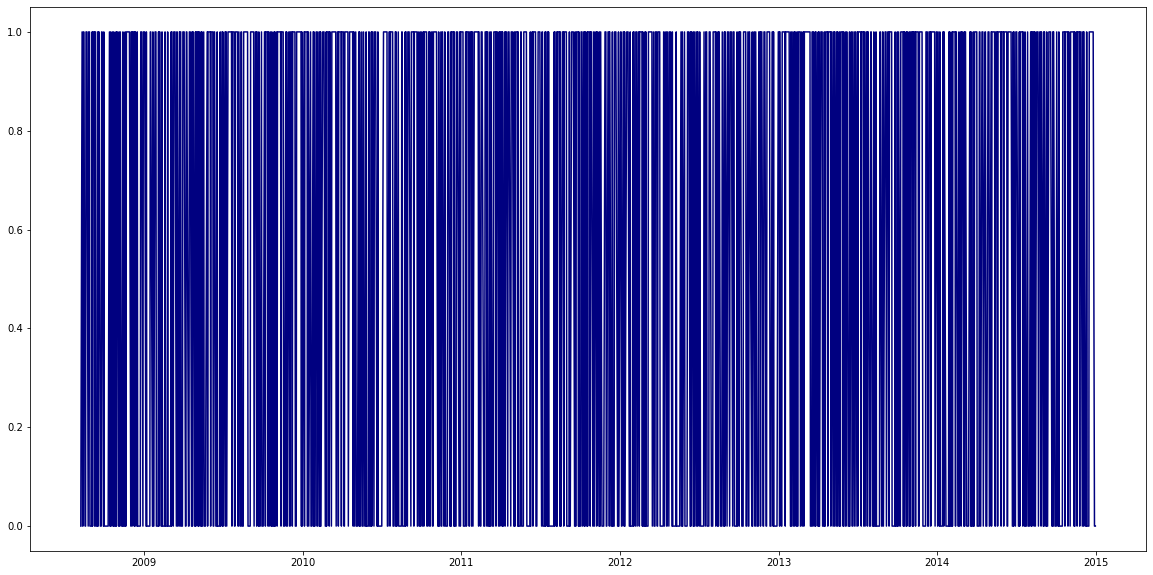

In [22]:
fig = plt.figure(figsize=(20,10))
plt.plot(df.Date,df.Label, color = 'navy');

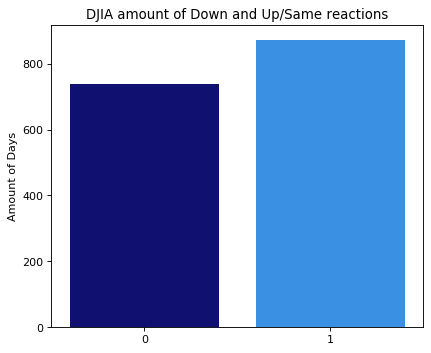

In [23]:
plt.figure(figsize=(6,5),dpi=80, facecolor='w', edgecolor='k')
my_pal = {0: "navy", 1: "dodgerblue"}
sns.countplot(x='Label', data=df, palette = my_pal).set(title = 'DJIA amount of Down and Up/Same reactions',
                                                        xlabel = '', ylabel = 'Amount of Days' );

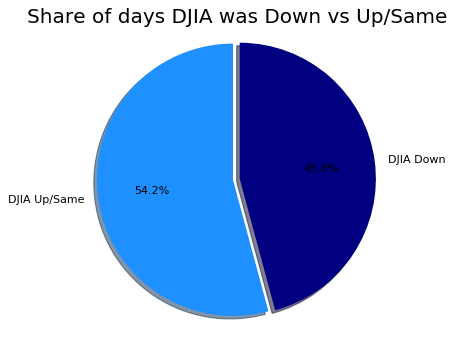

In [24]:
figure(num=None, figsize=(6,5 ), dpi=80, facecolor='w', edgecolor='k')
numbers =  [number_of_ones, number_of_zeros]
explode = (0, 0.05)
labels= ['DJIA Up/Same', 'DJIA Down']
plt.pie(numbers, explode =explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=('dodgerblue', 'navy'))
plt.axis('equal')
plt.title('Share of days DJIA was Down vs Up/Same', size = 18);

In [25]:
df1.head(3)

Date          Open          High           Low         Close  \
0 2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1 2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2 2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   

      Volume      AdjClose  
0   82160000  17949.369141  
1  133030000  17929.990234  
2  106380000  17694.679688

In [26]:
df1 = df1.sort_values(by=['Date'])

In [27]:
df1.head(4)

Date          Open          High           Low         Close  \
1988 2008-08-08  11432.089844  11759.959961  11388.040039  11734.320312   
1987 2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
1986 2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
1985 2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   

         Volume      AdjClose  
1988  212830000  11734.320312  
1987  183190000  11782.349609  
1986  173590000  11642.469727  
1985  182550000  11532.959961

In [28]:
df = pd.merge(df, df1)

In [29]:
df.tail(2)

Date  Label                                               Top1  \
1609 2014-12-30      0  China businessman jailed for 13 years for buyi...   
1610 2014-12-31      0  AirAsia flight found at the bottom of the Java...   

                                                   Top2  \
1609  AirAsia live: Emergency slide, plane door seen...   
1610  North Korean defector details 'human experimen...   

                                                   Top3  \
1609  AirAsia plane wreckage found, bodies being rec...   
1610  Korean Air ex-executive Cho Hyun-ah arrested -...   

                                                   Top4  \
1609  Scotland confirms case of Ebola - Ebola cases ...   
1610  South Korean to drop Sony film "The Interview"...   

                                                   Top5  \
1609  Pope Francis to Catholics: It's time to take a...   
1610  U.S. opening of oil export widens battle: The ...   

                                                   Top6  \
1609  Oil hits five-and-a-half-year low below $57 on...   
1610  FBI agents investigating the Sony Pictures hac...   

                                                   Top7  \
1609  "Lizard Squad" members who ruined Christmas fo...   
1610  Indian Government Orders Blocking of 32 Websit...   

                                                   Top8  ...  \
1609  Two students in Thailand face up to 15 years i...  ...   
1610  Russia annual inflation jumps to 11.4% as roub...  ...   

                                                  Top22  \
1609  Search area for Air Asia QZ8501 expanded, stil...   
1610  Al Shabaab leader killed in U.S. air strike in...   

                                                  Top23  \
1609       Ebola case confirmed in Glasgow | World news   
1610  New solar power material converts 90 percent o...   

                                                  Top24  \
1609  AirAsia plane carrying 153 people overshoots r...   
1610  China launches website laying claim to Senkaku...   

                                                  Top25          Open  \
1609  One of China's most industrialized cities has ...  18035.019531   
1610        At Least 33 Killed in Yemen Suicide Bombing  17987.660156   

              High           Low         Close    Volume      AdjClose  
1609  18035.019531  17959.699219  17983.070312  47490000  17983.070312  
1610  18043.220703  17820.880859  17823.070312  82840000  17823.070312  

[2 rows x 33 columns]

In [30]:
# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df.Date), y=list(df.AdjClose)))

# Set title
fig.update_layout(
    title_text="DJIA index development 2008-08-08 till 2016-07-01"
)


# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=
            True
        ),
        type="date"
    )
)

fig.show()

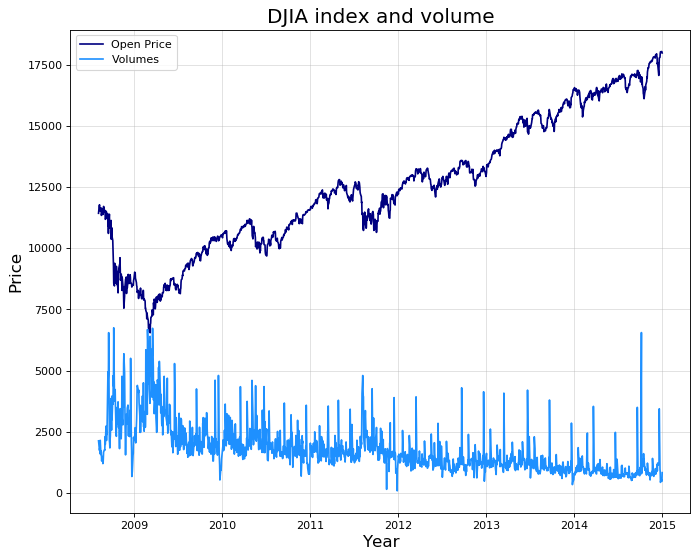

In [31]:
plt.figure(figsize=(10,8),dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df.Open,label = "Open Price", color= 'navy')
plt.plot(df.Date, df.Volume/100000,label = "Volumes", color = 'dodgerblue');# scale volumes for readability
plt.legend()
plt.grid(True, alpha = 0.4)
plt.xlabel("Year", size = 15)
plt.ylabel("Price", size = 15)
plt.title("DJIA index and volume", size = 18);

In [32]:
print('During the considered period the lowest value of DJIA was {} points'.format(df.AdjClose.min()))
print('Which was reached on {}'.format(str(df.loc[df['AdjClose'] == df.AdjClose.min(), 'Date'].iloc[0].date())))
print("")
print('During the considered period the highest value of DJIA was {} points'.format(df.AdjClose.max()))
print('Which was reached on {}'.format(str(df.loc[df['AdjClose'] == df.AdjClose.max(), 'Date'].iloc[0].date())))
print("")
print('The absolute return during this period was {}%.'.format(round((df.AdjClose.max()-df.AdjClose.min())/df.AdjClose.min()*100,2)))


During the considered period the lowest value of DJIA was 6547.049805 points
Which was reached on 2009-03-09

During the considered period the highest value of DJIA was 18053.710938 points
Which was reached on 2014-12-26

The absolute return during this period was 175.75%.


In [33]:
df['pct'] = (df['Close'] - df['Open']) / df['Open'] * 100

In [34]:
#Return = 100*(df.pct(:1)+1)*(df.pct(:1)+1)

In [35]:
df.pct.cumsum() 

0        2.643703
1        3.092818
2        1.911066
3        1.052721
4        1.779905
          ...    
1606    72.309705
1607    72.395135
1608    72.348868
1609    72.060821
1610    71.145806
Name: pct, Length: 1611, dtype: float64

In [36]:
df.pct.sum()

71.14580606710794

In [37]:
df.head(4)

Date  Label                                               Top1  \
0 2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1 2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2 2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3 2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   
2  b'Christopher King argues that the US and NATO...   
3  b' Quarter of Russians blame U.S. for conflict...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   
2                        b'America: The New Mexico?'   
3  b'Georgian president  says US military will ta...   

                                               Top25          Open  \
0           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
1  b"So this is what it's come to: trading sex fo...  11729.669922   
2  b"BBC NEWS | Asia-Pacific | Extinction 'by man...  11781.700195   
3  b'2006: Nobel laureate Aleksander Solzhenitsyn...  11632.809570   

           High           Low         Close     Volume      AdjClose       pct  
0  11759.959961  11388.040039  11734.320312  212830000  11734.320312  2.643703  
1  11867.110352  11675.530273  11782.349609  183190000  11782.349609  0.449115  
2  11782.349609  11601.519531  11642.469727  173590000  11642.469727 -1.181752  
3  11633.780273  11453.339844  11532.959961  182550000  11532.959961 -0.858345  

[4 rows x 34 columns]

In [38]:
df['Delta']=df['AdjClose']-df['Open']

In [39]:
print("Describing statistics about the diff feature.")
print (df['Delta'].describe())

Describing statistics about the diff feature.
count    1611.000000
mean        4.816281
std       136.498836
min      -774.169922
25%       -50.964843
50%         9.070313
75%        71.289551
max       925.190430
Name: Delta, dtype: float64


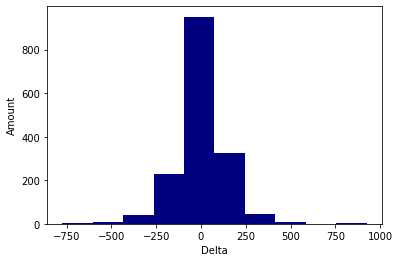

In [40]:
plt.xlabel('Delta')
plt.ylabel('Amount')
plt.hist(df['Delta'], color = 'navy')
plt.show()

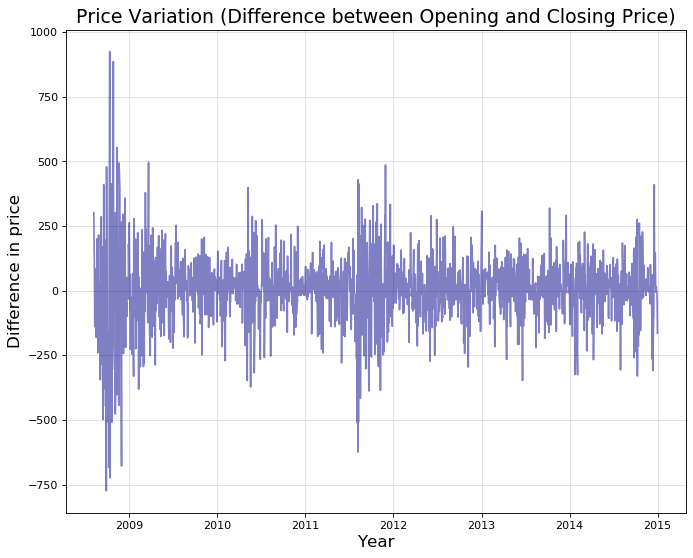

In [41]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df.Delta, alpha = 0.5, color= 'darkblue')
plt.grid(True, alpha = 0.4)
plt.xlabel("Year", size = 15)
plt.ylabel("Difference in price", size = 15)
plt.title("Price Variation (Difference between Opening and Closing Price)", size = 17);

In [42]:
# Compute the logarithmic returns using the Closing price 
df['Log_Ret'] = np.log(df['Close'] / df['Close'].shift(1))

# The rolling function uses a window of 252 trading days. 
# Each of the days in the selected lookback period is assigned an equal weight. 
# The user can choose a longer or a shorter period as per his need.

# Compute Volatility using the pandas rolling standard deviation function
df['Volatility'] = df['Log_Ret'].rolling(window=252).std() * np.sqrt(252)

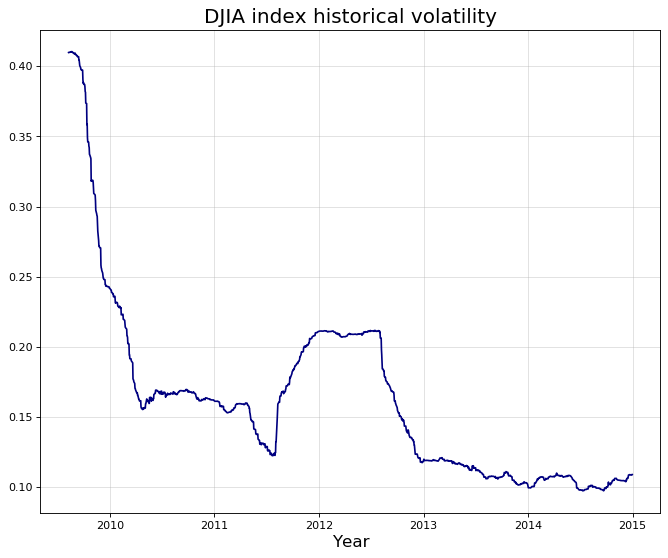

In [43]:
plt.figure(figsize=(10,8),dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df.Volatility,label = "Volatility", color = 'navy');
plt.grid(True, alpha = 0.4)
plt.xlabel("Year", size = 15)
plt.title("DJIA index historical volatility", size = 18);

In [44]:
df.tail(3)

Date  Label                                               Top1  \
1608 2014-12-29      0  Solar Power Storage Prices Drop 25% In Germany...   
1609 2014-12-30      0  China businessman jailed for 13 years for buyi...   
1610 2014-12-31      0  AirAsia flight found at the bottom of the Java...   

                                                   Top2  \
1608  North Korea Hit Again By Internet Outage; Expe...   
1609  AirAsia live: Emergency slide, plane door seen...   
1610  North Korean defector details 'human experimen...   

                                                   Top3  \
1608  ARCHAEOLOGY - Massive ancient underground city...   
1609  AirAsia plane wreckage found, bodies being rec...   
1610  Korean Air ex-executive Cho Hyun-ah arrested -...   

                                                   Top4  \
1608  Reopen investigation into Westminster pedophil...   
1609  Scotland confirms case of Ebola - Ebola cases ...   
1610  South Korean to drop Sony film "The Interview"...   

                                                   Top5  \
1608  Taliban declare 'defeat' of U.S., allies in Af...   
1609  Pope Francis to Catholics: It's time to take a...   
1610  U.S. opening of oil export widens battle: The ...   

                                                   Top6  \
1608  British Falklands defence review after militar...   
1609  Oil hits five-and-a-half-year low below $57 on...   
1610  FBI agents investigating the Sony Pictures hac...   

                                                   Top7  \
1608    Virgin Confirms Fault On Plane Circling Over UK   
1609  "Lizard Squad" members who ruined Christmas fo...   
1610  Indian Government Orders Blocking of 32 Websit...   

                                                   Top8  ...          Open  \
1608  Photo of 'women murdered for refusing sex jiha...  ...  18046.580078   
1609  Two students in Thailand face up to 15 years i...  ...  18035.019531   
1610  Russia annual inflation jumps to 11.4% as roub...  ...  17987.660156   

              High           Low         Close    Volume      AdjClose  \
1608  18073.039062  18021.570312  18038.230469  53870000  18038.230469   
1609  18035.019531  17959.699219  17983.070312  47490000  17983.070312   
1610  18043.220703  17820.880859  17823.070312  82840000  17823.070312   

           pct       Delta   Log_Ret Volatility  
1608 -0.046267   -8.349609 -0.000858   0.108554  
1609 -0.288046  -51.949219 -0.003063   0.108600  
1610 -0.915015 -164.589844 -0.008937   0.108919  

[3 rows x 37 columns]

### Price Volatility (High and  Low difference)

In [48]:
df['Delta_Vol'] = df['High'] - df['Low']

In [49]:
df['Delta_Vol'].median()

132.7802730000003

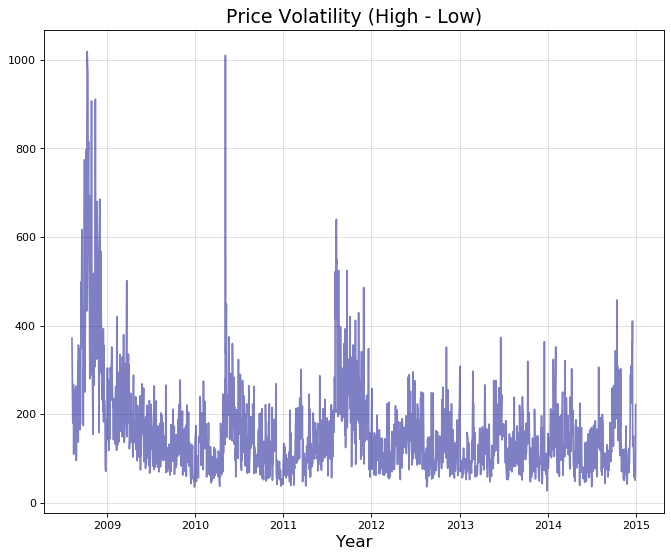

In [51]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df.Delta_Vol, alpha = 0.5, color= 'darkblue')
plt.grid(True, alpha = 0.4)
plt.xlabel("Year", size = 15)
#plt.ylabel("Percentage", size = 15)
plt.title("Price Volatility (High - Low)", size = 17);

The historical median fo Delta Volatility over the previous 20 years (1896-05-27 to 2020-04-24) was 94.3; and mean 121.3.

In [52]:
def to_label (row):
    if row['Delta_Vol'] < 121.3:
        return 0
    if row['Delta_Vol'] > 121.3:
        return 1

In [53]:
df['Vol_Label'] = df.apply (lambda row: to_label(row), axis=1)

In [54]:
count_zero= df.loc[df['Vol_Label'] == 0]
number_of_zeros= len(count_zero)

count_one = df.loc[df['Vol_Label'] == 1]
number_of_ones = len(count_one)

print(' Total amount of values/rows:' ,  count,"\n",'Total number of days DJIA Delta Volatility was above its historical average: ', 
      number_of_ones, "\n", "Total number of days DJIA Delta Volatility was below its historical average:", number_of_zeros)

 Total amount of values/rows: 1611 
 Total number of days DJIA Delta Volatility was above its historical average:  902 
 Total number of days DJIA Delta Volatility was below its historical average: 709


In [55]:
df.sample(5)

Date  Label                                               Top1  \
129  2009-02-12      0  b'A teenage thief picked on the wrong victim w...   
172  2009-04-16      1  b'London police are now deleting tourists\' ph...   
1129 2013-02-04      0  The remains of Richard III, one of the most fa...   
32   2008-09-24      0  b"Iran leader says 'American empire' near coll...   
1488 2014-07-09      1  Germany destroy Brazil 7-1 as Miroslav Klose b...   

                                                   Top2  \
129      b'US intel confirms Iran not developing nukes'   
172   b"Schoolboy gets sarcasm instead of help when ...   
1129  Women in Paris are finally allowed to wear tro...   
32    b'Global corruption index: Somalia most, Denma...   
1488  Approximately 23 buses have been set ablaze in...   

                                                   Top3  \
129                             b'Revolt is in the air'   
172   b"In the Indian election, 700m voters, 28 days...   
1129  In rush to urbanize, China flattens 700 mounta...   
32    b"All Systems Go for China's Manned Space Launch"   
1488  British woman, 65, 'threw spear at officials' ...   

                                                   Top4  \
129     b'U.S. judges accused of jailing kids for cash'   
172   b'Afghan Women Stoned During Protest of Rape L...   
1129  Ahmadinejad says he wants to be Irans first as...   
32    b'The wreckage of a suspected US spy plane has...   
1488         There is a second Snowden - says Greenwald   

                                                   Top5  \
129   b"Zimbabwe's PM: world needs to get over Rober...   
172   b'Police brutality: The camera is mightier tha...   
1129  Match fixing in European Soccer: Investigators...   
32    b'Children are targets of Nigerian witch hunt ...   
1488  Latest Snowden Leaks: FBI Targeted Muslim-Amer...   

                                                   Top6  \
129   b'Ted Rall: "In America, a French clich goes, ...   
172   b'Robert Fisk: How can you trust the cowardly ...   
1129  Yemen confirmed on Saturday that a ship interc...   
32                  b"N Korea nuclear seals 'removed' "   
1488                  Another German Spy working for US   

                                                   Top7  \
129   b"UK Government's Former Chief Scientific Advi...   
172   b'Pirate Bay Trial Update - Verdict Comes Friday'   
1129  To curb rape, Muslim group calls for end to co...   
32    b'North Korea expels IAEA monitors from atom b...   
1488  Israeli rockets strike at more than 400 Gaza s...   

                                                   Top8  ...           Low  \
129                         b'Plane Crashes in Buffalo'  ...   7693.979980   
172                    b'Russia ends war with Chechnya'  ...   7962.709961   
1129  Windfarms in Spain Produce More Electricity Th...  ...  13866.830078   
32    b"Amid milk scare, China's elite get special f...  ...  10753.570312   
1488           Bill Gates funds birth control microchip  ...  16913.810547   

             Close     Volume      AdjClose       pct       Delta   Log_Ret  \
129    7932.759766  331960000   7932.759766  0.009954    0.789551 -0.000853   
172    8125.430176  359470000   8125.430176  1.199257   96.290039  0.011861   
1129  13880.080078  130420000  13880.080078 -0.925852 -129.709961 -0.009302   
32    10825.169922  183630000  10825.169922 -0.229028  -24.849609 -0.002675   
1488  16985.609375   67120000  16985.609375  0.406573   68.779297  0.004661   

     Volatility   Delta_Vol Vol_Label  
129         NaN  244.839844         1  
172         NaN  205.410156         1  
1129   0.119360  142.959961         1  
32          NaN  174.830079         1  
1488   0.097786   85.138672         0  

[5 rows x 39 columns]

## Technical Indicators

Adapted from Zhai et al (2007): Stochastic %K, Stochastic %D, Momentum, Rate of Change, William's %R, A/D Oscillator, Disparity 5

### Stochastic %K

A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. The sensitivity of the oscillator to market movements is reducible by adjusting that time period or by taking a moving average of the result. It is used to generate overbought and oversold trading signals, utilizing a 0-100 bounded range of values.

The Formula For The Stochastic Oscillator is: 
%K=(C - L14)/(H14 - L14)×100

where:
C = The most recent closing price
L14 = The lowest price traded of the 14 previous
trading sessions
H14 = The highest price traded during the same
14-day period
%K = The current value of the stochastic indicator

%K is referred to sometimes as the slow stochastic indicator.

[source](https://www.investopedia.com/terms/s/stochasticoscillator.asp)

In [56]:
def StoK(close, low, high, n):  
    StoK = ((close - low.rolling(n).min() / high.rolling(n).max() - low.rolling(n).min())) * 100
    return StoK

In [57]:
df['Stoch_%K'] = StoK(df['Close'], df['Low'], df['High'], 14)

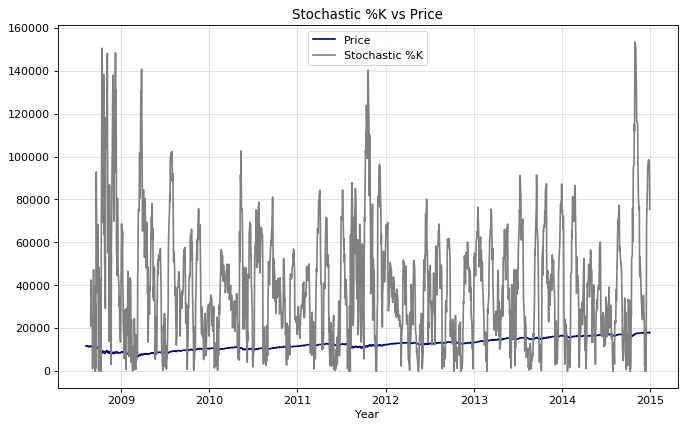

In [58]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df.Close,label = 'Price', color='navy')
plt.plot(df.Date, df['Stoch_%K'],label = 'Stochastic %K', color='grey')
plt.xlabel("Year")
plt.title("Stochastic %K vs Price")
plt.grid(True, alpha = 0.4)
plt.legend();

### Stochastic %D

The Formula For The Stochastic Oscillator is: 
%K=(C - L14)/(H14 - L14)×100

where:
C = The most recent closing price
L14 = The lowest price traded of the 14 previous
trading sessions
H14 = The highest price traded during the same
14-day period
%K = The current value of the stochastic indicator

The "fast" stochastic indicator is taken as %D = 3-period moving average of %K.

[source](https://www.investopedia.com/terms/s/stochasticoscillator.asp)

In [59]:
def StoD(close, low, high, n):
    StoK = ((close - low.rolling(n).min() / high.rolling(n).max() - low.rolling(n).min())) * 100
    StoD = StoK.rolling(window = 3).mean()
    return StoD

In [60]:
df['Stoch_%D'] = StoD(df['Close'], df['Low'], df['High'], 10)

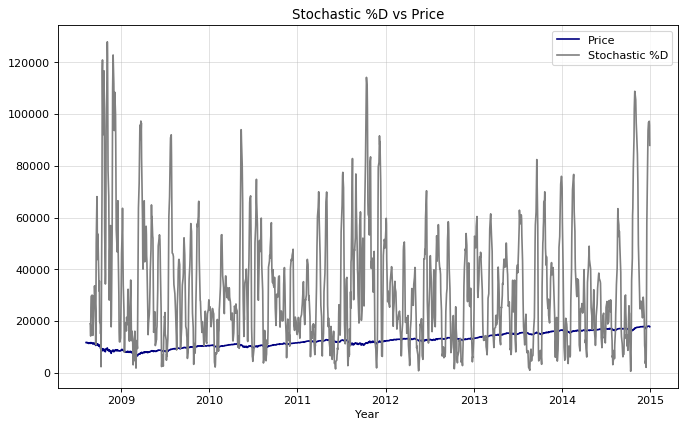

In [61]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df.Close,label = 'Price', color='navy')
plt.plot(df.Date, df['Stoch_%D'],label = 'Stochastic %D', color='grey')
plt.xlabel("Year")
plt.title("Stochastic %D vs Price")
plt.grid(True, alpha = 0.4)
plt.legend();

### Momentum

Momentum is the speed or velocity of price changes in a stock, security, or tradable instrument. Momentum shows the rate of change in price movement over a period of time to help investors determine the strength of a trend. Stocks that tend to move with the strength of momentum are called momentum stocks.

[Source](https://www.investopedia.com/articles/technical/081501.asp)

In [62]:
df['Momentum'] = df['Close'].diff(periods=3)

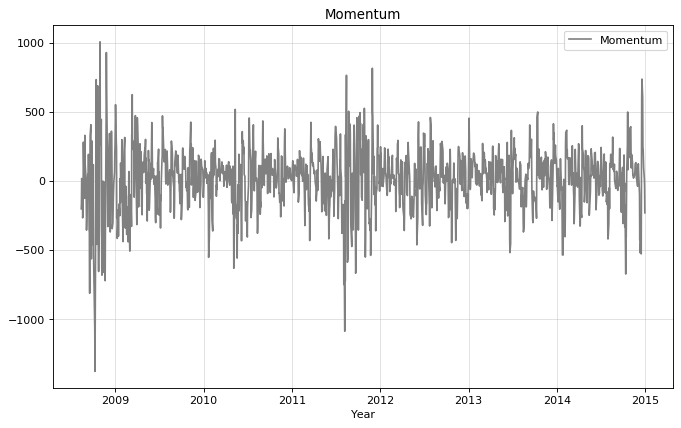

In [63]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df['Momentum'],label = 'Momentum', color='grey')
plt.xlabel("Year")
plt.title("Momentum")
plt.grid(True, alpha = 0.4)
plt.legend();

### Rate of Change

The Price Rate of Change (ROC) is a momentum-based technical indicator that measures the percentage change in price between the current price and the price a certain number of periods ago. The ROC indicator is plotted against zero, with the indicator moving upwards into positive territory if price changes are to the upside, and moving into negative territory if price changes are to the downside.

[Source](https://www.investopedia.com/terms/p/pricerateofchange.asp)

In [64]:
df['Rate_of_Change'] = df['Close'].pct_change()

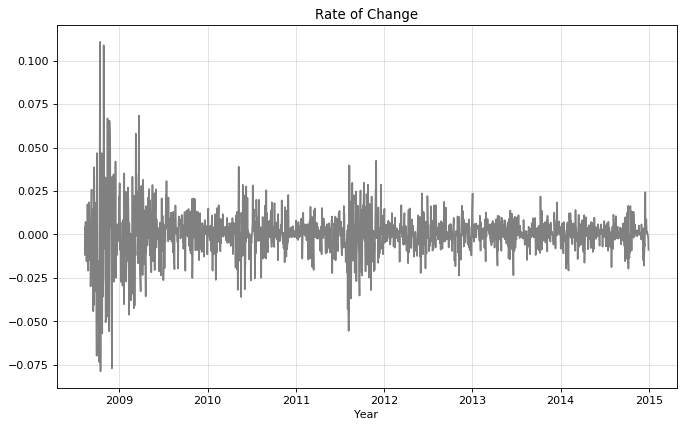

In [65]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df['Rate_of_Change'],label = 'Rate of Change', color='grey')
plt.xlabel("Year")
plt.title("Rate of Change")
plt.grid(True, alpha = 0.4);

### William's %R

Williams %R, also known as the Williams Percent Range, is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels. The Williams %R may be used to find entry and exit points in the market.

[Source](https://www.investopedia.com/terms/w/williamsr.asp)

In [66]:
df['Williams_R'] = df.ta.willr(df['High'], df['Low'], df['Close'], lbp=14, fillna=False)

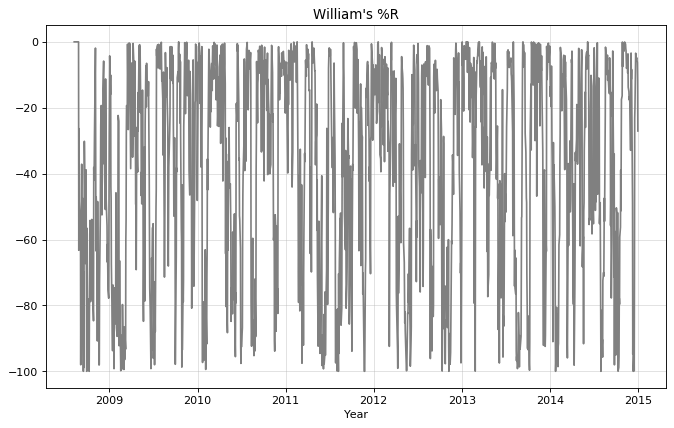

In [67]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df['Williams_R'],label = "William's %R", color='grey')
plt.xlabel("Year")
plt.title("William's %R")
plt.grid(True, alpha = 0.4);

### A/D Oscillator

Accumulation/distribution is a cumulative indicator that uses volume and price to assess whether a stock is being accumulated or distributed. The accumulation/distribution measure seeks to identify divergences between the stock price and volume flow. This provides insight into how strong a trend is. If the price is rising but the indicator is falling this indicates that buying or accumulation volume may not be enough to support the price rise and a price decline could be forthcoming.

[Source](https://www.investopedia.com/terms/a/accumulationdistribution.asp)

In [68]:
df['A/D_Oscillator'] = df.ta.adosc(df['High'], df['Low'], df['Close'], df['Volume'], df['Open'])

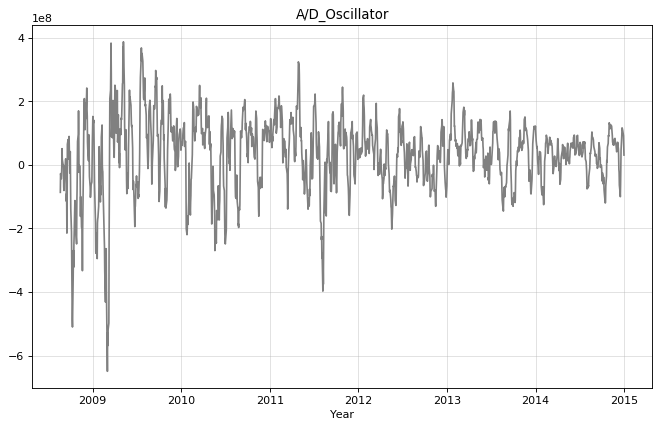

In [69]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df['A/D_Oscillator'], color='grey')
plt.xlabel("Year")
plt.title("A/D_Oscillator")
plt.grid(True, alpha = 0.4);

### Disparity 5

The disparity index is a technical indicator that measures the relative position of an asset's most recent closing price to a selected moving average and reports the value as a percentage. In our case it is a 5-day MA.

[Source](https://www.investopedia.com/terms/d/disparityindex.asp)

In [70]:
df['MA5'] = df.Close.rolling(window=5).mean()
df['Disparity_5'] = df['Close']/df['MA5']*100

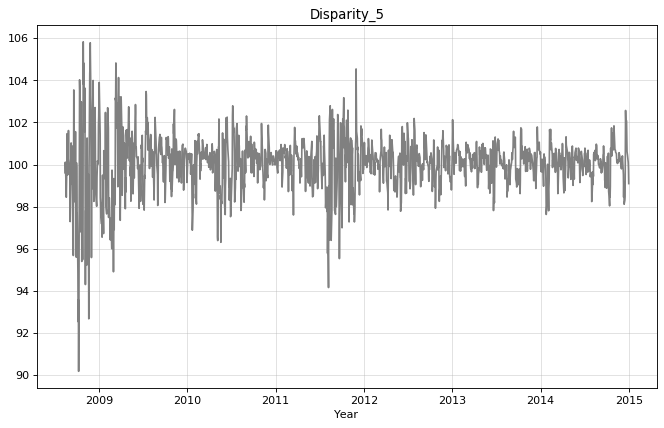

In [71]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df['Disparity_5'], color='grey')
plt.xlabel("Year")
plt.title("Disparity_5")
plt.grid(True, alpha = 0.4);

### Moving Averages

Moving Averages are price based, lagging (or reactive) indicators that display the average price of a security over a set period of time. A Moving Average is a good way to gauge momentum as well as to confirm trends, and define areas of support and resistance. Essentially, Moving Averages smooth out the “noise” when trying to interpret charts. Noise is made up of fluctuations of both price and volume. Because a Moving Average is a lagging indicator and reacts to events that have already happened, it is not used as a predictive indicator but as an interpretive one for confirmations and analysis.

[Source](https://www.tradingview.com/scripts/movingaverage/)

In [72]:
df['MA20'] = df.AdjClose.rolling(window=20).mean()
df['MA60'] = df.AdjClose.rolling(window=60).mean()
df['MA150'] = df.AdjClose.rolling(window=150).mean()

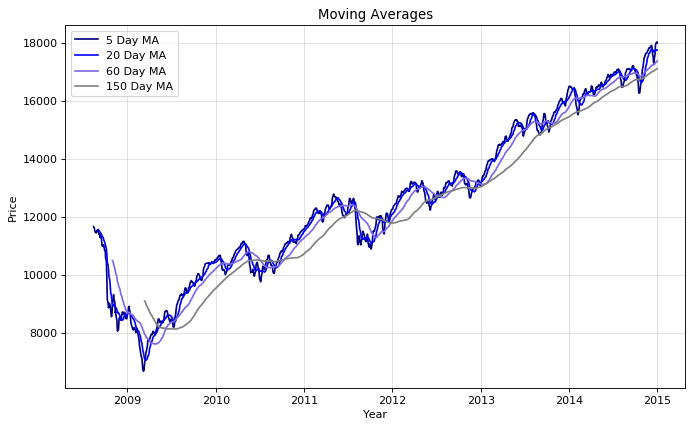

In [73]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df.MA5,label = '5 Day MA', color='navy')
plt.plot(df.Date, df.MA20,label = '20 Day MA', color='blue')
plt.plot(df.Date, df.MA60,label = '60 Day MA', color= 'mediumslateblue')
plt.plot(df.Date, df.MA150,label = '150 Day MA', color= 'grey')
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Moving Averages")
plt.grid(True, alpha = 0.4)
plt.legend();

### RSI

The Stochastic RSI (StochRSI) is an indicator used in technical analysis that ranges between zero and one (or zero and 100 on some charting platforms) and is created by applying the Stochastic oscillator formula to a set of relative strength index (RSI) values rather than to standard price data. Using RSI values within the Stochastic formula gives traders an idea of whether the current RSI value is overbought or oversold.

[Source](https://www.investopedia.com/terms/s/stochrsi.asp)

In [74]:
df['rsi'] = ta.rsi(df.AdjClose, 14)

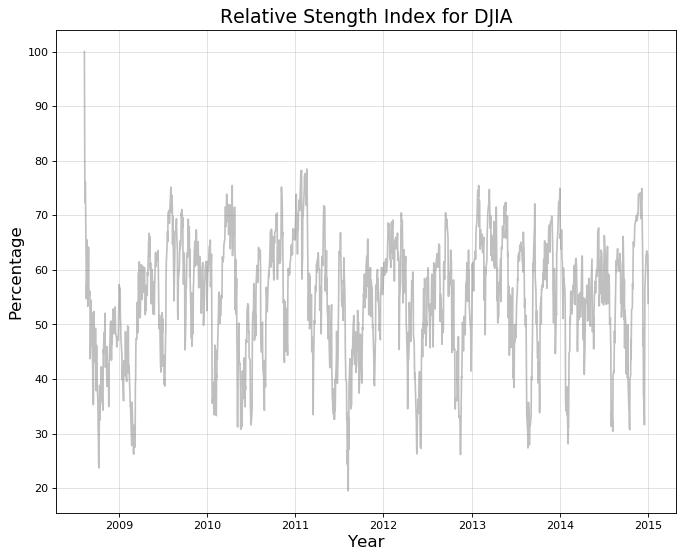

In [75]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df.rsi, alpha = 0.5, color= 'grey')
plt.grid(True, alpha = 0.4)
plt.xlabel("Year", size = 15)
plt.ylabel("Percentage", size = 15)
plt.title("Relative Stength Index for DJIA", size = 17);

### MACD

Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

[Source](https://www.investopedia.com/terms/m/macd.asp)

In [76]:
df['26 ema'] = df.ta.ema(df['Close'], length = 26)
df['12 ema'] = df.ta.ema(df['Close'], length = 12)
df['MACD'] = (df['12 ema'] - df['26 ema'])

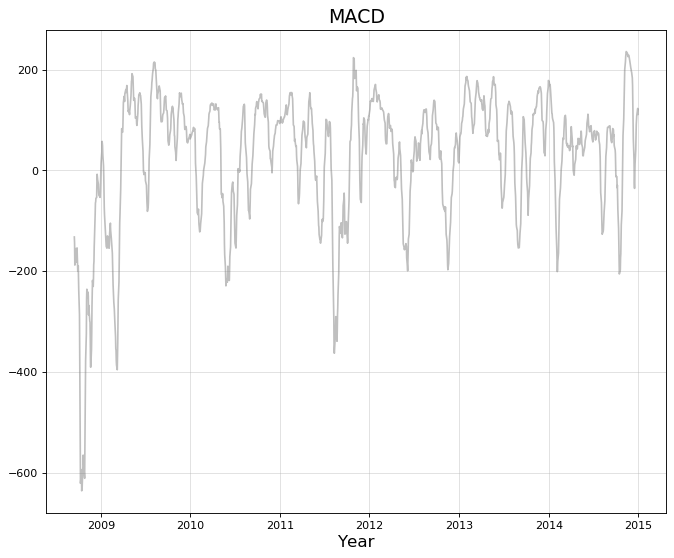

In [77]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Date, df.MACD, alpha = 0.5, color= 'grey')
plt.grid(True, alpha = 0.4)
plt.xlabel("Year", size = 15)
plt.title("MACD", size = 17);

## Data Cleaning and Preparation

In [78]:
df1 = df1.sort_values(by=['Date'])

In [79]:
df = pd.merge(df, df1)

In [80]:
df.head(1)

Date  Label                                               Top1  \
0 2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   

                                      Top2  \
0  b'BREAKING: Musharraf to be impeached.'   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   

                                                Top8  ... A/D_Oscillator MA5  \
0  b"The 'enemy combatent' trials are nothing but...  ...            NaN NaN   

  Disparity_5 MA20 MA60 MA150 rsi 26 ema 12 ema MACD  
0         NaN  NaN  NaN   NaN NaN    NaN    NaN  NaN  

[1 rows x 54 columns]

In [81]:
df['AllNews'] = df.iloc[:,2:27].astype(str).apply(' '.join, axis=1)

In [82]:
df.insert(2,'AllNews', df.pop("AllNews"))

In [84]:
df.columns

Index(['Date', 'Label', 'AllNews', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5',
       'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13',
       'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjClose', 'pct', 'Delta', 'Log_Ret', 'Volatility',
       'Delta_Vol', 'Vol_Label', 'Stoch_%K', 'Stoch_%D', 'Momentum',
       'Rate_of_Change', 'Williams_R', 'A/D_Oscillator', 'MA5', 'Disparity_5',
       'MA20', 'MA60', 'MA150', 'rsi', '26 ema', '12 ema', 'MACD'],
      dtype='object')

In [85]:
# !Change the last number (to 39?) for dropping all the unnecessary columns
df.drop(df.iloc[:,3:39], axis=1, inplace=True)

In [86]:
df.columns

Index(['Date', 'Label', 'AllNews', 'Open', 'High', 'Low', 'Close', 'Volume',
       'AdjClose', 'pct', 'Delta', 'Log_Ret', 'Volatility', 'Delta_Vol',
       'Vol_Label', 'Stoch_%K', 'Stoch_%D', 'Momentum', 'Rate_of_Change',
       'Williams_R', 'A/D_Oscillator', 'MA5', 'Disparity_5', 'MA20', 'MA60',
       'MA150', 'rsi', '26 ema', '12 ema', 'MACD'],
      dtype='object')

In [92]:
df.head(3)

Date  Label                                            AllNews  \
0 2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1 2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2 2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   

           Open          High           Low         Close     Volume  \
0  11432.089844  11759.959961  11388.040039  11734.320312  212830000   
1  11729.669922  11867.110352  11675.530273  11782.349609  183190000   
2  11781.700195  11782.349609  11601.519531  11642.469727  173590000   

       AdjClose       pct  ...  A/D_Oscillator  MA5  Disparity_5  MA20  MA60  \
0  11734.320312  2.643703  ...             NaN  NaN          NaN   NaN   NaN   
1  11782.349609  0.449115  ...             NaN  NaN          NaN   NaN   NaN   
2  11642.469727 -1.181752  ...             NaN  NaN          NaN   NaN   NaN   

   MA150         rsi  26 ema  12 ema MACD  
0    NaN         NaN     NaN     NaN  NaN  
1    NaN  100.000000     NaN     NaN  NaN  
2    NaN   82.779565     NaN     NaN  NaN  

[3 rows x 30 columns]

In [93]:
df.dropna(inplace= True)

In [95]:
df.isnull().sum().sum()

0

# Sentiment analysis

Sentiment and subjectivity score extraction
Now I run the sentiment analysis extracting the compound score that goes from -0.5 (most negative) to 0.5 (most positive). I'm going to use the "dirty" texts in this part because VADER can utilize the information such as ALL CAPS, punctuation, etc. I'll also calculate the subjectivity of each headline using the TextBlob package.

Initialise the VADER analyzer.

In [96]:
SentAn = SentimentIntensityAnalyzer()

Write a function to save the subjectivity score directly from TextBlob function's output. Subjectivity score might detect direct quotes in the headlines and positive stuff is rarely quoted in the headline.

In [97]:
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [98]:
import time
start = time.time()

start_vect=time.time()
print("Sentiment Analysis initialized...")

#df['AllNews'] = df['AllNews'].astype(str) # Make sure data is treated as a string
df['AllNews'+'_pos']= df['AllNews'].apply(lambda x:SentAn.polarity_scores(x)['pos'])
df['AllNews'+'_neg']= df['AllNews'].apply(lambda x:SentAn.polarity_scores(x)['neg'])
df['AllNews'+'_comp']= df['AllNews'].apply(lambda x:SentAn.polarity_scores(x)['compound'])
df['AllNews'+'_sub'] = df['AllNews'].apply(detect_subjectivity)
    
print("Vaderization process completed after %0.2f Minutes"%((time.time() - start_vect)/60))

Sentiment Analysis initialized...
Vaderization process completed after 0.39 Minutes


In [99]:
df.sample(3)

Date  Label                                            AllNews  \
689 2011-05-04      0  British about to vote against ending of 2 part...   
981 2012-06-29      1  British Journalist Sexually Assaulted in Cairo...   
897 2012-03-01      1  Megaupload Founder Defeats US Govt Attempts To...   

             Open          High           Low         Close     Volume  \
689  12806.290039  12806.679688  12673.019531  12723.580078  193720000   
981  12604.599609  12880.389648  12604.530273  12880.089844  191630000   
897  12952.290039  13032.669922  12943.059570  12980.299805  139670000   

         AdjClose       pct  ...          MA60         MA150        rsi  \
689  12723.580078 -0.645854  ...  12268.696338  11751.264675  65.117103   
981  12880.089844  2.185633  ...  12739.719141  12669.441348  58.630319   
897  12980.299805  0.216253  ...  12522.181885  11897.839570  63.300066   

           26 ema        12 ema        MACD  AllNews_pos  AllNews_neg  \
689  12483.192202  12634.208565  151.016363        0.047        0.203   
981  12622.684932  12644.721737   22.036805        0.032        0.135   
897  12835.035455  12939.735235  104.699780        0.046        0.158   

     AllNews_comp AllNews_sub  
689       -0.9974    0.425066  
981       -0.9952    0.268150  
897       -0.9959    0.438952  

[3 rows x 34 columns]

# Pre-Processing

In [100]:
df.head(1)

Date  Label                                            AllNews  \
252 2009-08-10      0  b"Malaysia's brain-damaged government declares...   

            Open         High          Low        Close     Volume  \
252  9368.410156  9371.959961  9290.339844  9337.950195  161370000   

        AdjClose       pct  ...         MA60        MA150        rsi  \
252  9337.950195 -0.325135  ...  8662.817334  8179.268792  71.362266   

         26 ema       12 ema        MACD  AllNews_pos  AllNews_neg  \
252  8973.79517  9186.973019  213.177849        0.045        0.149   

     AllNews_comp AllNews_sub  
252       -0.9959    0.440269  

[1 rows x 34 columns]

In [101]:
from nltk.tokenize import word_tokenize

df['AllNews'] = [word_tokenize(x) for x in df['AllNews']]

In [102]:
stop = stopwords.words('english')
# 
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))
# 
def isSymbol(inputString):
    return bool(re.match(r'[^\w]', inputString))
# lemma
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def check(word):
    """
         If you need this word, then True
         If it should be removed, False
    """
    word= word.lower()
    if word in stop:
        return False
    elif hasNumbers(word) or isSymbol(word):
        return False
    else:
        return True

# Combine the above methods
def preprocessing(sen):
    res = []
    for word in sen:
        if check(word):
            # The use of this paragraph is just to remove the mark left in the Python byte store str. . The data was not processed before, and this will not happen in other cases.
            word = word.lower().replace("b'", '').replace('b"', '').replace('"', '').replace("'", '').replace("b", '')
            res.append(wordnet_lemmatizer.lemmatize(word))   
    return res

In [103]:
df['AllNews'] = [preprocessing(x) for x in df['AllNews']]

# Text Exploration

In [105]:
non_decrease = df[df['Label']==1]
decrease = df[df['Label']==0]

In [106]:
non_decrease_word=[]
decrease_word=[]
for each in df['AllNews']:
    non_decrease_word.append(each)

for each in df['AllNews']:
    decrease_word.append(each)

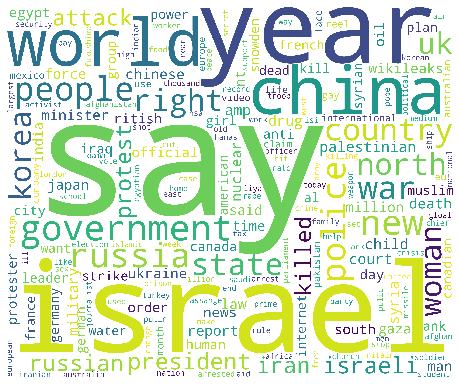

In [107]:
# Run a wordcloud on the positive market days.
pos_txt = []
for row in range(0, len(df[df['Label'] == 1])):
    pos_txt.append(' '.join(str(x) for x in df[df['Label'] == 1].iloc[row,2]))
    
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vect_A = TfidfVectorizer(stop_words='english')
pos_trans = vect_A.fit_transform(pos_txt)
pos_count = pos_trans.toarray().sum(axis=0) 

col_names = vect_A.get_feature_names()
pos_dict = dict(zip(col_names, pos_count))

from wordcloud import WordCloud,STOPWORDS
pos_wc = WordCloud(background_color='white', width=3000, height=2500).generate_from_frequencies(pos_dict)
plt.figure(1,figsize=(8,8))
plt.imshow(pos_wc)
plt.axis('off')
plt.show()

In [108]:
# Show the top 5 words and their counts and percentages. 
import operator
pos_sort = sorted(pos_dict.items(), reverse=True, key=operator.itemgetter(1))
df_pos = pd.DataFrame(data=pos_sort, columns=['token', 'count'])
df_pos['percentage'] = df_pos['count']/df_pos['count'].sum()*100
df_pos.head(5)

token      count  percentage
0     say  21.050039    0.199856
1  israel  17.949856    0.170422
2    year  17.782765    0.168836
3   china  17.684856    0.167906
4   world  17.556771    0.166690

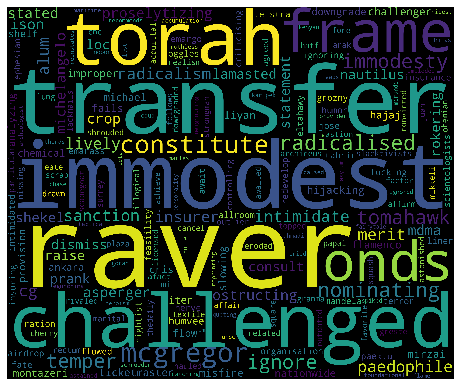

In [109]:
# Run a wordcloud on the negative market days.
neg_txt = []
for row in range(0, len(df[df['Label'] == 0])):
    neg_txt.append(' '.join(str(x) for x in df[df['Label'] == 0].iloc[row,2]))
    
neg_trans = vect_A.fit_transform(neg_txt)
neg_count = neg_trans.toarray().sum(axis=0) 

neg_dict = dict(zip(col_names, neg_count))

neg_wc = WordCloud(background_color='black', width=3000, height=2500).generate_from_frequencies(neg_dict)
plt.figure(1,figsize=(8,8))
plt.imshow(neg_wc)
plt.axis('off')
plt.show()

In [110]:
# Show the top 5 words and their counts and percentages.
neg_sort = sorted(neg_dict.items(), reverse=True, key=operator.itemgetter(1))
df_neg = pd.DataFrame(data=neg_sort, columns=['token', 'count'])
df_neg['percentage'] = df_neg['count']/df_neg['count'].sum()*100
df_neg.head(5)

token      count  percentage
0       raver  16.551829    0.192463
1    transfer  14.689539    0.170809
2    immodest  14.430982    0.167802
3  challenged  14.055447    0.163436
4       torah  14.024449    0.163075

# Text as Feature

Word ebmedding has several advantages over the traditional bag-of-words approach to represent text as a feature (e.g. TF-IDF or Count Vectorize). There are three commonly used pre-trained word embedding models: Word2Vec (by Google), GloVe (by Stanford), fastText (by Facebook). Since Word2Vec was trained on GoogleNews, which is akin to our data set, this model will be used in this project.

In [111]:
path = get_tmpfile("word2vec.model")

In [112]:
model = Word2Vec(df['AllNews'], size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [113]:
model.train(df.AllNews, total_examples=1, epochs=1)

(396916, 402162)

In [114]:
def get_SenVector(word_list):
    res = np.zeros([100])
    for word in word_list:
        if word in model:
            res += model[word]
    return res

In [115]:
df['AllNews'] = [get_SenVector(x) for x in df['AllNews']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [125]:
df.sample(2)

Date  Label                                            AllNews  \
1332 2013-11-21      1  [-215.01352435490116, -24.623690083011752, -30...   
954  2012-05-22      0  [-196.90703621832654, -15.885073642253701, -26...   

              Open          High           Low         Close     Volume  \
1332  15908.070312  16016.040039  15908.070312  16009.990234   79000000   
954   12505.379883  12575.959961  12447.330078  12502.809570  133650000   

          AdjClose       pct  ...          MA60         MA150        rsi  \
1332  16009.990234  0.640681  ...  15395.408187  15266.173802  67.006424   
954   12502.809570 -0.020554  ...  12988.493782  12546.330801  34.431636   

            26 ema        12 ema       MACD  AllNews_pos  AllNews_neg  \
1332  15695.675652  15852.583832  156.90818        0.083        0.147   
954   12816.056920  12660.377160 -155.67976        0.027        0.160   

      AllNews_comp AllNews_sub  
1332       -0.9905    0.363758  
954        -0.9959    0.352112  

[2 rows x 34 columns]

In [119]:
model.wv.most_similar('putin', topn=10)

[('pm', 0.9939969182014465),
 ('vladimir', 0.9929491877555847),
 ('tony', 0.9916594624519348),
 ('erdogan', 0.991457998752594),
 ('aott', 0.9911389350891113),
 ('nicolas', 0.9910681247711182),
 ('acted', 0.990982174873352),
 ('viktor', 0.9909255504608154),
 ('lair', 0.9907616376876831),
 ('david', 0.9901780486106873)]

In [120]:
model.wv.most_similar('trump', topn=10)

[('question', 0.9995747208595276),
 ('longer', 0.9995427131652832),
 ('danish', 0.9994713664054871),
 ('considered', 0.999467670917511),
 ('microsoft', 0.9994512796401978),
 ('glenn', 0.9994152188301086),
 ('popular', 0.999397337436676),
 ('lior', 0.9993773102760315),
 ('writes', 0.9993715286254883),
 ('pledge', 0.9993712306022644)]

In [121]:
model.wv.most_similar('europe', topn=10)

[('system', 0.9974535703659058),
 ('crisis', 0.9972667694091797),
 ('uild', 0.9972623586654663),
 ('economic', 0.9968630075454712),
 ('alance', 0.9965842366218567),
 ('rink', 0.9964939951896667),
 ('cooling', 0.9964890480041504),
 ('rics', 0.996457040309906),
 ('gloal', 0.9962784051895142),
 ('industrial', 0.9962466955184937)]